# Google Colab 데이터 로드

In [19]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [6]:
#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['의사결정나무_과일종류_2가지.csv']),
                       encoding='cp949')
src_data

Saving 의사결정나무_과일종류_2가지.csv to 의사결정나무_과일종류_2가지.csv


,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,1900,19.0
5,수박,600,9.0
6,참외,500,8.0
7,참외,400,7.5
8,참외,450,5.0
9,참외,400,4.5


# 로컬 데이터 로드

In [5]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
src_data = pd.read_csv('../머신러닝실습용자료/의사결정나무_과일종류_2가지.csv',encoding='cp949')
src_data

FileNotFoundError: [Errno 2] No such file or directory: '../머신러닝실습용자료/의사결정나무_과일종류_2가지.csv'

# 공통 실습 코드

In [7]:
#Step 3.주어진 데이터를 훈련용 데이터와 검증용 데이터로 나눕니다

# 무게, 길이에 따른 종류 판별
data = src_data[["무게","길이"]]
target = src_data["종류"]

print(data)
print(target)

# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=40)

      무게    길이
0   2000  30.0
1   2500  25.0
2   1800  20.0
3   1500  16.0
4   1900  19.0
5    600   9.0
6    500   8.0
7    400   7.5
8    450   5.0
9    400   4.5
10   600   9.5
11   550   8.5
0     수박
1     수박
2     수박
3     수박
4     수박
5     수박
6     참외
7     참외
8     참외
9     참외
10    참외
11    참외
Name: 종류, dtype: object


In [8]:
print(X_train.shape , X_test.shape)
print(y_train)

(9, 2) (3, 2)
3    수박
4    수박
1    수박
2    수박
0    수박
8    참외
5    수박
7    참외
6    참외
Name: 종류, dtype: object


In [9]:
# Step 4.훈련용 데이터로 모델 생성후 테스트용 데이터로 모델을 검증합니다.
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 분류기 생성

dt = DecisionTreeClassifier()

# 학습

dt.fit(X_train, y_train)

# score 출력

print(dt.score(X_test,y_test))


# 예측 : 수박이 나오면 성공
dt.predict([[1500,15]])

0.6666666666666666


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['수박'], dtype=object)

In [10]:
# split하지 않은 데이터로 모델 훈련 다시 진행(판단 과정을 그림으로 확인하기 위함)

dt = DecisionTreeClassifier()

# 학습

dt.fit(data, target)

# 예측 : 수박이 나오면 성공
dt.predict([[1500,15]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['수박'], dtype=object)

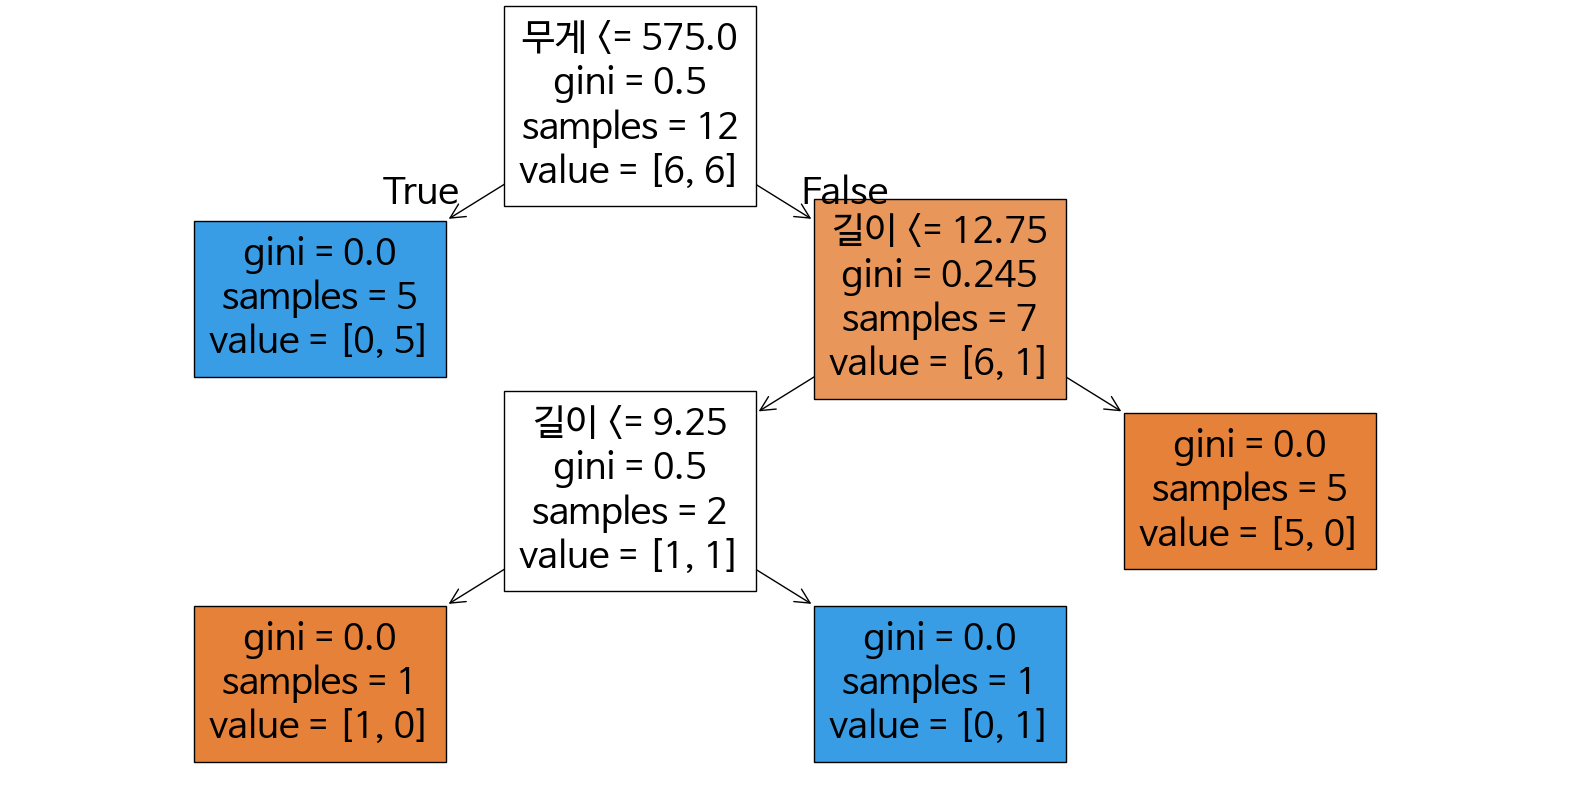

In [11]:
#Step 5. 판단 과정을 그림으로 확인합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from sklearn.tree import plot_tree
plt.figure( figsize=(20,10))
plot_tree(dt, max_depth=5 , filled=True ,
          feature_names=['무게','길이'] )

plt.show()